# Exploratory Data Analysis (EDA)

In [41]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
sys.path.append('../src')
from utils import load_data, load_stata_data, null_columns


In [36]:
# load the CEI dataset
data_file_path = '../data/raw/MSIA_2024_CEI_data.csv'
data = load_data(data_file_path)

### 1. Understanding the Structure


In [37]:
print("Dataset loaded successfully. Here are the first few rows:")
data.head()

Dataset loaded successfully. Here are the first few rows:


,starttime,endtime,deviceid,devicephonenum,subscriberid,simid,DATAUSE,DATE,FACTYPE,NAME_C,NAME_OR,NAME_SF,NAME_MSL,NAME_PSS,NAME_OTH,REGION,LOCATION,TR2DH,TR2DM,FPTYPE,FPTYPEFPMETH,FPTYPEFPREM,FPTYPEFPNO,FPTYPEFPDK,FPTYPEFPREF,FPreceived,FSTER,MSTER,IUD,IMP,INJ,OC,MC,FC,EC,OMM,REF,calculation_FP,AVAIL_FP,REMOPTS,calculation_FPREM,REMWHY,FPREMSIDE,RCYCLE,RINFECT,RMOOD,RHLTH,RWEIGHT,RSIDEOTH,RSIDEREF,REMWHERE,PAIN_REM,PAINMAN_REM,PAINOP_IMPREM,PAINOP_IMPREM1,PAINOP_IMPREM2,PAINOP_IMPREM3,PAINOP_IMPREM666,PAINOP_IMPREM999,PAINOP_IMPREM888,PAINOP_IUDREM,PAINOP_IUDREM1,PAINOP_IUDREM2,PAINOP_IUDREM3,PAINOP_IUDREM4,PAINOP_IUDREM666,PAINOP_IUDREM999,PAINOP_IUDREM888,MEDBEF_REM,PAINSCALE_DREM,PAINDUR_REM,MEDDUR_REM,PAINSCALE_AREM,PAINAFT_REM,MEDAFT_REM,PAINRES_REM,servicereceived,SAC,FPCounsel,PTEST,HIV,STI,CCS,MCH,GEN,OTHSRH,OTHGEN,ADDNONE,ADDREF,ANC_C,DELC_C,PNC_C,SACTYPE,calculation_SAC,Service_Received,FPEVER,FPWANT,FPCURR,CMETH,Prev_FPmethod,FPWHERE,CMADD,CMADDMTH,CMADDMTH1,CMADDMTH2,CMADDMTH3,CMADDMTH4,CMADDMTH5,CMADDMTH6,CMADDMTH7,CMADDMTH8,CMADDMTH9,CMADDMTH10,CMADDMTH11,CMADDMTH12,CMADDMTH888,CMCURWNT,CMACCESS,COUNSEL_PAFP,WNTMETH,SPCMTH,WAMETH,RECMETH,CHMETH,METHNO,METHDIFF,CMREASON,RECCOUN,FOLLUP,CONTUSE,OTHERMETH,TOLDABOUT,CHFSTER,CHMSTER,CHIUD,CHIMP,CHINJ,CHOCP,CHMC,CHFC,CHEC,CHLAM,CHOMM,CHTRAD,CHDK,CMAUTO,IMPACT,IMPEDU,IMPWRK,IMPFAM,IMPHLTH,IMPOTH,IMPNONE,IMPDK,IMPREF,REC,RET,PRIV,REST,WAIT,CARE,ENOUGH,SERIOUS,RPRT,COMFORT,GEN_SAT,HOURS,FEED,PRIVINFO,PAIN_CM,PAINMAN_CM,PAINOP_IMP,PAINOP_IMP1,PAINOP_IMP2,PAINOP_IMP3,PAINOP_IMP666,PAINOP_IMP999,PAINOP_IMP888,PAINOP_IUD,PAINOP_IUD1,PAINOP_IUD2,PAINOP_IUD3,PAINOP_IUD4,PAINOP_IUD666,PAINOP_IUD999,PAINOP_IUD888,MEDBEF_CM,PAINSCALE_DCM,PAINDUR_CM,MEDDUR_CM,PAINSCALE_ACM,PAINAFT_CM,MEDAFT_CM,PAINRES_CM,INFO,IADVERT,IRADIO,INEWS,IMEET,INET,ISOCMED,ISIGN,ISPKR,IPRMAT,MSAFG_IRELG,INFOOTH,INFONO,AWRTIME,REFER,RCBM,RPUBPROV,RPRIVPROV,RREFU,RREFNU,REFNONE,CCUSE_BEF,CELLOWN,POSIPC,KSANCTION,KMENSUPP,KCOMSUPP,KLEADSUP,FPDECMAK,GENDER,AGE,EDU,MAR,CHILD,PPART,IDEALFS,JOB,DISPLACED,WHERE_DISP,WHY_DISPA,WHY_DISPB,DIS1,DIS2,DIS3,DIS4,DIS5,DIS6,MPI_YS,MPI_SCA,MPI_CM,MPI_FLR,MPI_WALL,MPI_ROOF,MPI_TOSHR,MPI_TO,MPI_CF,MPI_WATDIS,MPI_WAT,MPI_ELEC,MPI_TRUCK,MPI_ASSETS,unique_id1,unique_id2,unique_id3,unique_id4,unique_id5,NUMBERQ,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index,FPREMTYPE,CCREAS_BEF,id,FPREM,FP,FPMETHUNK,MSP,MSMP,CHOICEtot,CHOICEtotAllMethods,othermeth_calc,filterPAIN,filterPAIN_FPMSP,filterPAINFP,NINFO,ENUMID,FPREC,REMCLIENTONLY,SACLIENT,COREMSI,FPCLIENTONLY,NMETH,countSRH,FPCLIENT,ADOPTER,SWITCH,FPNEVER,FP2020,FP2020C,FP2030,PCCC,RECCAT,RETCAT,SAT_PRIV,SAT_REST,SAT_WAIT,SAT_CARE,SAT_ENOUGH,SAT_SERIOUS,SAT_RPRT,SAT_COMFORT,SAT_PRIV_R,SAT_REST_R,SAT_WAIT_R,SAT_CARE_R,SAT_ENOUGH_R,SAT_SERIOUS_R,SAT_RPRT_R,SAT_COMFORT_R,TR2D,TR2DH2,POSIPC_A,KSANCTION_A,KMENSUPP_A,KCOMSUPP_A,KLEADSUP_A,age3grp_a,age4grp,age3grp_b,YOUTH,ADOLESCENT,MAR_BINARY,CHILD_GRP,MARPAR_GRP,NOEDUC,EDUC,DISABILITY1,DISABILITY3,DISABILITY4,filterSRH,m_educ,m_satt,m_cm,m_elct,m_wtr,m_sani,m_floor,m_roof,m_wall,m_hsg,m_ckfl,m_asst,mpiscore,hi_cm,hi_satt,hi_educ,hi_elct,hi_wtr,hi_sani,hi_hsg,hi_ckfl,hi_asst,himpiscore,lo_cm,lo_satt,lo_educ,lo_elct,lo_wtr,lo_sani,lo_hsg,lo_ckfl,lo_asst,lompiscore,mpi_poor,mpi_sevpoor,HICLIENT,CEI_type,fp_highest,pillar1
0,17-Dec-24,17-Dec-24,collect:Cd7XSswByJ0cwzOk,NaN,NaN,NaN,Yes,17-Dec-24,MSI centre,C1,NaN,NaN,NaN,NaN,NaN,Other,Urban,0,20,FPMETH,Yes,No,No,No,No,IUD,No,No,Yes,No,No,No,No,No,No,No,No,IUD/IUS,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FPCounsel,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,IUD/IUS,Yes,Yes,Yes,Male condoms,Male Condoms,MSI – this facility / site,Yes,7,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,NaN,NaN,Yes,Yes,Intra-uterine system or device,NaN,Yes – got the method wanted,NaN,NaN,NaN,Yes,Yes

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Columns: 380 entries, starttime to pillar1
dtypes: float64(28), int64(37), object(315)
memory usage: 991.7+ KB


In [46]:
# Read the STATA File
stata_file_path = '../data/raw/MSI_2024_CEI_Afghanistan.dta'
stata_data = load_stata_data(stata_file_path)

In [47]:
# View first five records
stata_data.head()

,starttime,endtime,deviceid,devicephonenum,subscriberid,simid,DATAUSE,DATE,FACTYPE,NAME_C,NAME_OR,NAME_SF,NAME_MSL,NAME_PSS,NAME_OTH,REGION,LOCATION,TR2DH,TR2DM,FPTYPE,FPTYPEFPMETH,FPTYPEFPREM,FPTYPEFPNO,FPTYPEFPDK,FPTYPEFPREF,FPreceived,FSTER,MSTER,IUD,IMP,INJ,OC,MC,FC,EC,OMM,REF,calculation_FP,AVAIL_FP,REMOPTS,calculation_FPREM,REMWHY,FPREMSIDE,RCYCLE,RINFECT,RMOOD,RHLTH,RWEIGHT,RSIDEOTH,RSIDEREF,REMWHERE,PAIN_REM,PAINMAN_REM,PAINOP_IMPREM,PAINOP_IMPREM1,PAINOP_IMPREM2,PAINOP_IMPREM3,PAINOP_IMPREM666,PAINOP_IMPREM999,PAINOP_IMPREM888,PAINOP_IUDREM,PAINOP_IUDREM1,PAINOP_IUDREM2,PAINOP_IUDREM3,PAINOP_IUDREM4,PAINOP_IUDREM666,PAINOP_IUDREM999,PAINOP_IUDREM888,MEDBEF_REM,PAINSCALE_DREM,PAINDUR_REM,MEDDUR_REM,PAINSCALE_AREM,PAINAFT_REM,MEDAFT_REM,PAINRES_REM,servicereceived,SAC,FPCounsel,PTEST,HIV,STI,CCS,MCH,GEN,OTHSRH,OTHGEN,ADDNONE,ADDREF,ANC_C,DELC_C,PNC_C,SACTYPE,calculation_SAC,Service_Received,FPEVER,FPWANT,FPCURR,CMETH,Prev_FPmethod,FPWHERE,CMADD,CMADDMTH,CMADDMTH1,CMADDMTH2,CMADDMTH3,CMADDMTH4,CMADDMTH5,CMADDMTH6,CMADDMTH7,CMADDMTH8,CMADDMTH9,CMADDMTH10,CMADDMTH11,CMADDMTH12,CMADDMTH888,CMCURWNT,CMACCESS,COUNSEL_PAFP,WNTMETH,SPCMTH,WAMETH,RECMETH,CHMETH,METHNO,METHDIFF,CMREASON,RECCOUN,FOLLUP,CONTUSE,OTHERMETH,TOLDABOUT,CHFSTER,CHMSTER,CHIUD,CHIMP,CHINJ,CHOCP,CHMC,CHFC,CHEC,CHLAM,CHOMM,CHTRAD,CHDK,CMAUTO,IMPACT,IMPEDU,IMPWRK,IMPFAM,IMPHLTH,IMPOTH,IMPNONE,IMPDK,IMPREF,REC,RET,PRIV,REST,WAIT,CARE,ENOUGH,SERIOUS,RPRT,COMFORT,GEN_SAT,HOURS,FEED,PRIVINFO,PAIN_CM,PAINMAN_CM,PAINOP_IMP,PAINOP_IMP1,PAINOP_IMP2,PAINOP_IMP3,PAINOP_IMP666,PAINOP_IMP999,PAINOP_IMP888,PAINOP_IUD,PAINOP_IUD1,PAINOP_IUD2,PAINOP_IUD3,PAINOP_IUD4,PAINOP_IUD666,PAINOP_IUD999,PAINOP_IUD888,MEDBEF_CM,PAINSCALE_DCM,PAINDUR_CM,MEDDUR_CM,PAINSCALE_ACM,PAINAFT_CM,MEDAFT_CM,PAINRES_CM,INFO,IADVERT,IRADIO,INEWS,IMEET,INET,ISOCMED,ISIGN,ISPKR,IPRMAT,MSAFG_IRELG,INFOOTH,INFONO,AWRTIME,REFER,RCBM,RPUBPROV,RPRIVPROV,RREFU,RREFNU,REFNONE,CCUSE_BEF,CELLOWN,POSIPC,KSANCTION,KMENSUPP,KCOMSUPP,KLEADSUP,FPDECMAK,GENDER,AGE,EDU,MAR,CHILD,PPART,IDEALFS,JOB,DISPLACED,WHERE_DISP,WHY_DISPA,WHY_DISPB,DIS1,DIS2,DIS3,DIS4,DIS5,DIS6,MPI_YS,MPI_SCA,MPI_CM,MPI_FLR,MPI_WALL,MPI_ROOF,MPI_TOSHR,MPI_TO,MPI_CF,MPI_WATDIS,MPI_WAT,MPI_ELEC,MPI_TRUCK,MPI_ASSETS,unique_id1,unique_id2,unique_id3,unique_id4,unique_id5,NUMBERQ,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index,FPREMTYPE,CCREAS_BEF,id,FPREM,FP,FPMETHUNK,MSP,MSMP,CHOICEtot,CHOICEtotAllMethods,othermeth_calc,filterPAIN,filterPAIN_FPMSP,filterPAINFP,NINFO,ENUMID,FPREC,REMCLIENTONLY,SACLIENT,COREMSI,FPCLIENTONLY,NMETH,countSRH,FPCLIENT,ADOPTER,SWITCH,FPNEVER,FP2020,FP2020C,FP2030,PCCC,RECCAT,RETCAT,SAT_PRIV,SAT_REST,SAT_WAIT,SAT_CARE,SAT_ENOUGH,SAT_SERIOUS,SAT_RPRT,SAT_COMFORT,SAT_PRIV_R,SAT_REST_R,SAT_WAIT_R,SAT_CARE_R,SAT_ENOUGH_R,SAT_SERIOUS_R,SAT_RPRT_R,SAT_COMFORT_R,TR2D,TR2DH2,POSIPC_A,KSANCTION_A,KMENSUPP_A,KCOMSUPP_A,KLEADSUP_A,age3grp_a,age4grp,age3grp_b,YOUTH,ADOLESCENT,MAR_BINARY,CHILD_GRP,MARPAR_GRP,NOEDUC,EDUC,DISABILITY1,DISABILITY3,DISABILITY4,filterSRH,m_educ,m_satt,m_cm,m_elct,m_wtr,m_sani,m_floor,m_roof,m_wall,m_hsg,m_ckfl,m_asst,mpiscore,hi_cm,hi_satt,hi_educ,hi_elct,hi_wtr,hi_sani,hi_hsg,hi_ckfl,hi_asst,himpiscore,lo_cm,lo_satt,lo_educ,lo_elct,lo_wtr,lo_sani,lo_hsg,lo_ckfl,lo_asst,lompiscore,mpi_poor,mpi_sevpoor,HICLIENT,CEI_type,fp_highest,pillar1
0,2024-12-17,2024-12-17,collect:Cd7XSswByJ0cwzOk,,,,1,2024-12-17,1,1.0,NaN,NaN,NaN,NaN,,666,1,0,20,FPMETH,1,0,0,0,0,IUD,0,0,1,0,0,0,0,0,0,0,0.0,IUD/IUS,1.0,1.0,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FPCounsel,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,NaN,,IUD/IUS,1,1,1.0,7.0,Male Condoms,1.0,1.0,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1,1.0,3.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,CHIUD,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,IMPEDU,1,0,0,0,0,0,0,0,9.0,10.0,5,5,5,5,5,5,5,5,5,1,1,1,1.0,1.0,,Na

### 2. Summary Statistics

In [13]:
# distribution of numerical columns
display()
pd.DataFrame(data.describe()).T

Display All Columns Feature Activated


,count,mean,std,min,25%,50%,75%,max
NAME_SF,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME_PSS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TR2DH,334.0,3.173653e-01,0.727741,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
TR2DM,334.0,2.034431e+01,15.913939,0.0,1.000000e+01,1.500000e+01,3.000000e+01,6.000000e+01
PAINOP_IMPREM,9.0,2.226667e+02,332.500000,1.0,1.000000e+00,1.000000e+00,6.660000e+02,6.660000e+02
PAINSCALE_DREM,19.0,3.736842e+00,2.642434,0.0,2.000000e+00,3.000000e+00,4.500000e+00,1.000000e+01
PAINSCALE_AREM,18.0,3.222222e+00,2.712836,0.0,1.000000e+00,2.500000e+00,4.000000e+00,1.000000e+01
METHDIFF,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CMAUTO,332.0,8.439759e+00,1.899113,0.0,7.750000e+00,9.000000e+00,1.000000e+01,1.000000e+01
PAINSCALE_DCM,78.0,3.743590e+00,2.645437,0.0,2.000000e+00,3.000000e+00,5.000000e+00,1.000000e+01


### 3. Data Cleaning
- Handling missing values, invalid data, etc.

In [42]:
# check columns with numm values
null_cols = null_columns(data)

list(null_cols)

['NAME_SF',
 'NAME_PSS',
 'METHDIFF',
 'unique_id3',
 'unique_id5',
 '_validation_status',
 '_notes',
 '_tags']

In [ ]:
# Remove the columns with no values
data = data.drop(columns=null_cols)

In [45]:
# Replace Region => other to Central in the dataset
data['REGION'] = data['REGION'].replace('Other', 'Central')
data['REGION'].unique()

array(['Central', 'North', 'West', 'South', 'East'], dtype=object)

### 4. Data Distribution

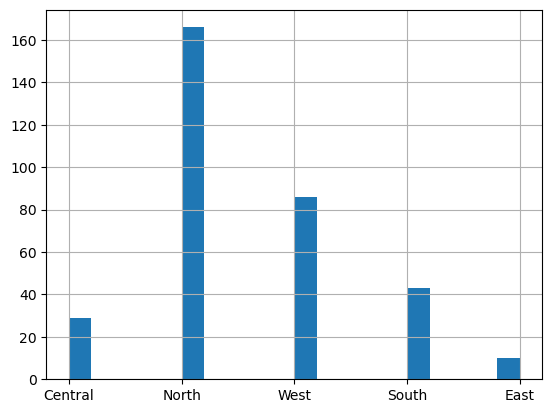

In [48]:
# Histogram: Data distribution across regions
data['REGION'].hist(bins=20)
plt.show()


### 5. Correlation Analysis
- Correlation matrix: To identify correlations between numerical variables

In [56]:
numerical_cols = data.select_dtypes(include=['number']).columns.drop(['_id', '_index','id'])

correlation_matrix = data[numerical_cols].corr()
correlation_matrix

,TR2DH,TR2DM,PAINOP_IMPREM,PAINSCALE_DREM,PAINSCALE_AREM,CMAUTO,PAINSCALE_DCM,PAINSCALE_ACM,AGE,CHILD,IDEALFS,FP,CHOICEtot,CHOICEtotAllMethods,NINFO,ENUMID,NMETH,countSRH,TR2D,m_educ,m_satt,m_cm,m_elct,m_wtr,m_sani,m_floor,m_roof,m_wall,m_hsg,m_ckfl,m_asst,mpiscore,hi_cm,hi_satt,hi_educ,hi_elct,hi_wtr,hi_sani,hi_hsg,hi_ckfl,hi_asst,himpiscore,lo_cm,lo_satt,lo_educ,lo_elct,lo_wtr,lo_sani,lo_hsg,lo_ckfl,lo_asst,lompiscore,mpi_sevpoor,pillar1
TR2DH,1.000000,0.265393,-0.250000,0.033100,0.140483,0.138222,-0.036633,-0.053733,-0.050470,-0.040510,0.059300,0.011904,-0.140387,-0.136497,-0.152151,0.394842,-0.032789,0.162852,0.952314,0.019535,-0.198193,0.073025,0.052567,0.124804,-0.115703,-0.122756,-0.106765,-0.106590,0.055253,0.105766,0.071697,-0.002003,0.073025,-0.201315,0.017218,0.050578,0.079634,-0.127682,0.023572,0.067956,0.071697,-0.021343,0.073025,-0.193835,0.022469,0.053450,0.143611,-0.082329,0.077013,0.119323,0.071697,0.011287,0.030890,0.258418
TR2DM,0.265393,1.000000,0.750000,0.315895,0.436231,-0.051490,0.202383,0.343889,0.053562,0.068537,0.122714,-0.020341,-0.307841,-0.298581,-0.446595,0.297093,0.104771,0.130815,0.546917,-0.014461,-0.110921,-0.066072,0.099439,-0.057282,-0.253807,0.134524,0.194506,0.194380,-0.136579,0.045188,-0.047908,-0.113939,-0.066072,-0.103974,-0.014524,0.101630,0.009942,-0.214413,-0.074120,0.104946,-0.047908,-0.093856,-0.066072,-0.115198,-0.014237,0.098002,-0.090423,-0.295789,-0.172009,0.012987,-0.047908,-0.147864,-0.098826,0.229648
PAINOP_IMPREM,-0.250000,0.750000,1.000000,0.490290,0.731272,0.391630,NaN,NaN,-0.425017,-0.304997,-0.275625,NaN,-0.866025,-0.866025,-0.670820,-0.328090,NaN,-0.158114,0.036466,0.188982,0.500000,NaN,0.188982,NaN,-0.577350,0.496160,0.498079,0.496160,-0.333333,-0.218218,-0.250000,0.502012,NaN,0.500000,0.188982,0.188982,0.188982,-0.316228,0.000000,0.188982,-0.250000,0.408248,NaN,0.500000,0.188982,0.188982,NaN,-0.632456,-0.377964,-0.250000,-0.250000,0.178571,NaN,-0.250000
PAINSCALE_DREM,0.033100,0.315895,0.490290,1.000000,0.885825,0.131911,NaN,NaN,0.254585,0.466731,0.555861,0.024117,-0.125610,-0.126131,-0.050656,-0.458784,NaN,0.427972,0.176024,-0.097748,-0.238656,NaN,0.247033,-0.311142,-0.177734,0.545500,0.546146,0.546146,-0.390322,-0.098145,-0.124739,-0.287855,NaN,-0.238656,-0.097748,0.247033,0.078147,-0.061147,-0.025885,0.211599,-0.124739,-0.100878,NaN,-0.238656,-0.097748,0.247033,-0.298306,-0.332682,-0.458776,-0.217683,-0.124739,-0.365982,-0.159170,-0.449114
PAINSCALE_AREM,0.140483,0.436231,0.731272,0.885825,1.000000,0.268982,NaN,NaN,0.210174,0.392042,0.494090,-0.112438,-0.170548,-0.098601,-0.139219,-0.335205,NaN,0.162551,0.326623,0.056319,-0.099321,NaN,0.371148,-0.299504,-0.355263,0.503503,0.503340,0.504019,-0.240966,0.069911,-0.045055,0.060553,NaN,-0.099321,0.056319,0.371148,0.029801,-0.277054,0.009424,0.278566,-0.045055,0.040041,NaN,-0.099321,0.056319,0.371148,-0.298010,-0.432114,-0.327811,-0.052274,-0.045055,-0.145342,-0.204433,-0.298489
CMAUTO,0.138222,-0.051490,0.391630,0.131911,0.268982,1.000000,-0.015110,-0.029976,0.018346,-0.072490,-0.103907,0.090803,-0.120860,-0.096027,-0.026647,-0.001331,0.006446,-0.165984,0.103703,-0.121177,0.101048,-0.002564,0.020658,0.102707,-0.137632,-0.058633,-0.049870,-0.049978,0.067819,0.009580,0.069326,0.041336,-0.002564,0.092405,-0.122094,0.019628,0.035847,-0.143204,0.053952,-0.014802,0.069326,-0.009925,-0.002564,0.106437,-0.119055,0.021144,0.130173,-0.113193,0.073412,0.020857,0.069326,0.019766,-0.000335,0.161071
PAINSCALE_DCM,-0.036633,0.202383,NaN,NaN,NaN,-0.015110,1.000000,0.697271,0.079196,0.147840,0.280262,NaN,0.140045,0.132039,0.082030,-0.125500,-0.044874,0.107308,0.033455,-0.182798,-0.361175,-0.008448,0.170717,-0.043436,-0.146877,0.220530,0.196076,0.197337,0.271591,0.031229,0.049557,-0.146588,-0.008448,-0.361175,-0.182798,0.170717,0.014430,-0.100021,0.297088,0.087903,0.049557,-0.154152,-0.008448,-0.361175,-0.182798,0.170717,-0.076342,-0.206253,0.202145,0.004229,0.049557,-0.202951,-0.072747,-0.039183
PAINSCALE_ACM,-0.053733,0.343889,NaN,NaN

### 6. Save the Processed Data

In [58]:
data.to_csv('../data/processed/MSIA_2024_CEI_Afghanistan_data.csv', index=False)